## Playing around with graphs

Explore relations between respiratory emergencies and contaminant concentrations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
from scipy.ndimage import gaussian_filter1d

Read summaries of emergencies and contaminat concentrations

In [2]:
summary_urgencias = pd.read_csv('../Resources/urgencias_asma-inf_por_delegacion.csv', index_col=False, encoding='UTF-8')
summary_urgencias = summary_urgencias.drop('Unnamed: 0', axis=1)
summary_contaminantes = pd.read_csv('../Resources/contaminant_data_14_16_maribel.csv', index_col=False)

In [3]:
summary_urgencias['date'] = pd.to_datetime(summary_urgencias['date'])
summary_contaminantes['date'] = pd.to_datetime(summary_contaminantes['date'])

In [4]:
summary_global = pd.merge (summary_urgencias, summary_contaminantes, on='date', how='outer')

This table is a huge summary of:
* Total respiratory emergencies per 100k popullation in each municipality
* Cases of childhood asthma per 100k popullation in each municipality
* Daily average concentration of Ozone (O$_{3}$) in each municipality where there are records
* Daily average concentration of Particulate Matter < 10$\mu$m (PM10) in each municipality where there are records


In [5]:
miDict= {'O3_AZ':'O3_AZCAPOTZALCO', 'PM10_AZ':'PM10_AZCAPOTZALCO',
       'O3_CY':'O3_COYOACAN', 'PM10_CY':'PM10_COYOACAN', 'O3_CJ':'O3_CUAJIMALPA', 'PM10_CJ':'PM10_CUAJIMALPA',
       'O3_CH':'O3_CUAUHTEMOC', 'PM10_CH':'PM10_CUAUHTEMOC', 
       'O3_IC':'O3_IZTACALCO', 'PM10_IC':'PM10_IZTACALCO', 'O3_IZ':'O3_IZTAPALAPA', 'PM10_IZ':'PM10_IZTAPALAPA',
       'O3_MH':'O3_MIGUELHIDALGO', 'PM10_MH':'PM10_MIGUELHIDALGO', 'O3_MA':'O3_MILPAALTA',
       'PM10_MA':'PM10_MILPAALTA', 'O3_TL':'O3_TLALPAN', 'PM10_TL':'PM10_TLALPAN',  
        'O3_VC':'O3_VENUSTIANO', 'PM10_VC':'PM10_VENUSTIANO', 'O3_AO':'O3_OBREGON',
       'PM10_AO':'PM10_OBREGON', 'O3_BJ':'O3_BENITOJUAREZ', 'PM10_BJ':'PM10_BENITOJUAREZ',
        'O3_XO':'O3_XOCHIMILCO', 'PM10_XO':'PM10_XOCHIMILCO'}  
    

In [6]:
summary_global = summary_global.rename(columns=miDict)

In [7]:
summary_global = summary_global.sort_values('date').reset_index(drop=True)

Calculate average ozone and PM10 concentration in the city

In [8]:
O3_columns = ['O3_AZCAPOTZALCO','O3_BENITOJUAREZ','O3_COYOACAN','O3_CUAJIMALPA','O3_IZTACALCO',
             'O3_IZTAPALAPA','O3_MIGUELHIDALGO','O3_MILPAALTA','O3_TLALPAN','O3_VENUSTIANO',
             'O3_XOCHIMILCO','O3_CUAUHTEMOC','O3_OBREGON']
PM10_columns= ['PM10_AZCAPOTZALCO','PM10_BENITOJUAREZ','PM10_COYOACAN','PM10_CUAJIMALPA',
               'PM10_CUAUHTEMOC','PM10_IZTACALCO','PM10_IZTAPALAPA','PM10_MIGUELHIDALGO',
               'PM10_MILPAALTA','PM10_TLALPAN','PM10_VENUSTIANO','PM10_XOCHIMILCO','PM10_OBREGON'] 

In [9]:
summary_global['O3_TOTAL_avg'] = summary_global[O3_columns].mean(axis=1)

In [10]:
summary_global['PM10_TOTAL_avg'] = summary_global[PM10_columns].mean(axis=1)

In [11]:
summary_global.to_csv('../Output/summary_global.csv', encoding='UTF-8')

In [12]:
summary_global.head()

,date,Cases/100k_ÁLVARO OBREGÓN,ASMA/100k_ÁLVARO OBREGÓN,Cases/100k_AZCAPOTZALCO,ASMA/100k_AZCAPOTZALCO,Cases/100k_BENITO JUÁREZ,ASMA/100k_BENITO JUÁREZ,Cases/100k_COYOACÁN,ASMA/100k_COYOACÁN,Cases/100k_CUAJIMALPA DE MORELOS,...,O3_MILPAALTA,PM10_MILPAALTA,O3_TLALPAN,PM10_TLALPAN,O3_VENUSTIANO,PM10_VENUSTIANO,O3_XOCHIMILCO,PM10_XOCHIMILCO,O3_TOTAL_avg,PM10_TOTAL_avg
0,2011-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-12-26,0.800019,NaN,8.746480,0.073814,2.395692,NaN,2.958196,NaN,1.003895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-27,2.666731,NaN,9.246278,0.036907,1.437415,NaN,2.465163,0.048543,1.505843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-28,1.866711,0.039384,7.996781,0.036907,0.958277,NaN,2.136475,0.024272,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-29,0.400010,NaN,8.996379,0.073814,0.718707,NaN,3.615573,0.024272,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
### Create dataframe with moving average for each of the values

In [13]:
summary_global = summary_global.set_index('date')

In [14]:
summary_global_MA = summary_global.rolling(7, min_periods=2).mean()\
    .reset_index()
summary_global_MA['date'] = pd.to_datetime(summary_global_MA['date'])
summary_global=summary_global.reset_index()
summary_global_MA.head()

,date,Cases/100k_ÁLVARO OBREGÓN,ASMA/100k_ÁLVARO OBREGÓN,Cases/100k_AZCAPOTZALCO,ASMA/100k_AZCAPOTZALCO,Cases/100k_BENITO JUÁREZ,ASMA/100k_BENITO JUÁREZ,Cases/100k_COYOACÁN,ASMA/100k_COYOACÁN,Cases/100k_CUAJIMALPA DE MORELOS,...,O3_MILPAALTA,PM10_MILPAALTA,O3_TLALPAN,PM10_TLALPAN,O3_VENUSTIANO,PM10_VENUSTIANO,O3_XOCHIMILCO,PM10_XOCHIMILCO,O3_TOTAL_avg,PM10_TOTAL_avg
0,2011-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-27,1.733375,NaN,8.996379,0.055361,1.916553,NaN,2.711679,NaN,1.254869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-28,1.777820,NaN,8.663180,0.049209,1.597128,NaN,2.519945,0.036407,1.254869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-29,1.433368,NaN,8.746480,0.055361,1.377523,NaN,2.793852,0.032362,1.254869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


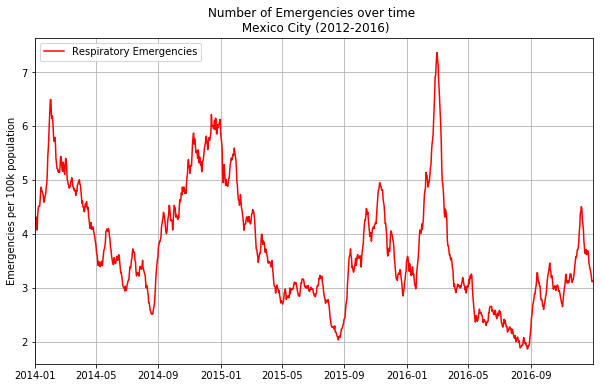

In [15]:
plt.figure(figsize =(10,6))

plt.title("Number of Emergencies over time \n Mexico City (2012-2016)")
# plt.xlabel("Date")
plt.ylabel("Emergencies per 100k population")

plt.grid()

resp, = plt.plot(summary_global_MA['date'], summary_global_MA['Cases/100k_TOTAL'], 
                 color='red', linewidth=1.5, label='Respiratory Emergencies')

# plt.xticks(labels=x_ticks, ticks=x_locs, ha='left')

plt.xlim(['2014-01-01', '2016-12-31'])

plt.legend(loc='best')

plt.savefig('../Images/CDMX_diseases overtime.png')
plt.show()

***
### Graph of total respiratory emergencies from January to December, years 2012-2016

In [16]:
y2016 = summary_global_MA.loc[summary_global_MA['date']>= '2016-01-01'] \
    .loc[summary_global_MA['date']<= '2016-12-30']
y2015 = summary_global_MA.loc[summary_global_MA['date']>= '2015-01-01'] \
    .loc[summary_global_MA['date']<= '2015-12-31']
y2014 = summary_global_MA.loc[summary_global_MA['date']>= '2014-01-01'] \
    .loc[summary_global_MA['date']<= '2014-12-31']
y2013 = summary_global_MA.loc[summary_global_MA['date']>= '2013-01-01'] \
    .loc[summary_global_MA['date']<= '2013-12-31']
y2012 = summary_global_MA.loc[summary_global_MA['date']>= '2012-01-01'] \
    .loc[summary_global_MA['date']<= '2012-12-30']

y2016 = y2016.loc[:,['date','Cases/100k_TOTAL']]
y2015 = y2015.loc[:,['date','Cases/100k_TOTAL']]
y2014 = y2014.loc[:,['date','Cases/100k_TOTAL']]
y2013 = y2013.loc[:,['date','Cases/100k_TOTAL']]
y2012 = y2012.loc[:,['date','Cases/100k_TOTAL']]

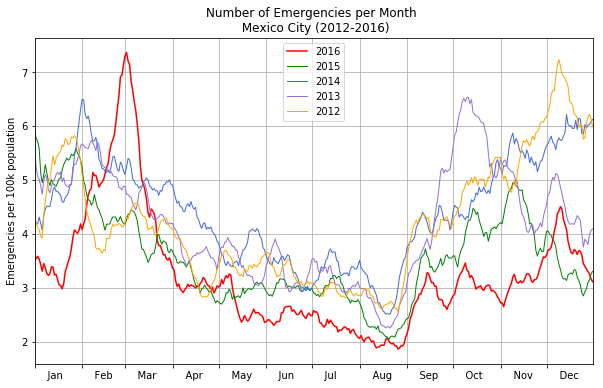

In [17]:
plt.figure(figsize =(10,6))

plt.title("Number of Emergencies per Month \n Mexico City (2012-2016)")
# plt.xlabel("Time")
plt.ylabel("Emergencies per 100k population")

plt.grid()

ur2016, = plt.plot(y2015['date'], y2016['Cases/100k_TOTAL'], color='red', linewidth=1.5, label='2016')
ur2015, = plt.plot(y2015['date'], y2015['Cases/100k_TOTAL'], color='green', linewidth=1, label='2015')
ur2014, = plt.plot(y2015['date'], y2014['Cases/100k_TOTAL'], color='royalblue', linewidth=1, label='2014')
ur2013, = plt.plot(y2015['date'], y2013['Cases/100k_TOTAL'], color='mediumpurple', linewidth=1, label='2013')
ur2012, = plt.plot(y2015['date'], y2012['Cases/100k_TOTAL'], color='orange', linewidth=1, label='2012')

x_ticks = np.array(['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec'])

x_locs = np.array(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', 
                   '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'])


plt.xticks(labels=x_ticks, ticks=x_locs, ha='left')

plt.xlim(y2015['date'].min(), y2015['date'].max())

plt.legend(handles=[ur2016, ur2015, ur2014, ur2013, ur2012], loc='best')

plt.savefig('../Images/CDMX_diseases several years.png')
plt.show()

***
### Graph of total respiratory emergencies and O**$_{3}$** concentration in 2016


Create sub-dataframe to graph

In [20]:
emergencies_O3_MA = summary_global_MA[['date', 'Cases/100k_TOTAL', 'O3_TOTAL_avg']] 
emergencies_O3_MA['O3_TOTAL_avg'] = summary_global['O3_TOTAL_avg']

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


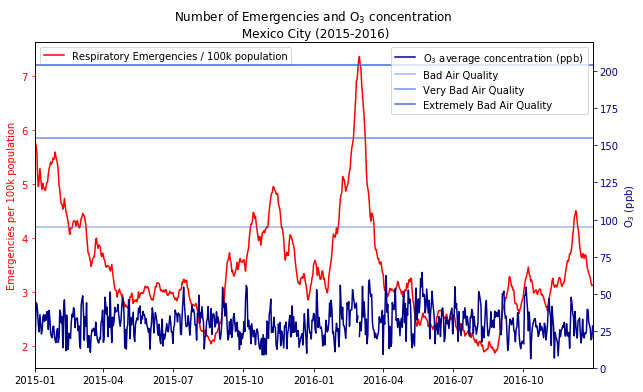

In [21]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.title("Number of Emergencies and O$_{3}$ concentration\n Mexico City (2015-2016)")

ax1.plot(emergencies_O3_MA['date'], emergencies_O3_MA['Cases/100k_TOTAL'], 
                   color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
# x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
#                     '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
# x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
#                    '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
# ax1.set_xticks(x_locs)
# ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'r')


ax2 = ax1.twinx()
ax2.plot(emergencies_O3_MA['date'], emergencies_O3_MA['O3_TOTAL_avg'], 
                    color='darkblue', linewidth=1.5, label='O$_{3}$ average concentration (ppb)')
ax2.set_ylabel('O$_{3}$ (ppb)', color = 'darkblue')
ax2.tick_params('y', colors = 'darkblue')
ax2.set_ylim(0,220)

ax2.axhline(y=95, color='royalblue', linewidth = 1.5, label= 'Bad Air Quality', alpha = 0.5)
ax2.axhline(y=155, color='royalblue', linewidth = 1.5, label= 'Very Bad Air Quality', alpha = 0.75)
ax2.axhline(y=204, color='royalblue', linewidth = 1.5, label= 'Extremely Bad Air Quality', alpha = 1)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')


plt.savefig('../Images/CDMX_Total_vs_O3_NEWdata.png')
plt.show()

***
### Graph of total respiratory emergencies and PM10 concentration in 2016


Create sub-dataframe to graph

In [22]:
emergencies_PM10_MA = summary_global_MA[['date', 'Cases/100k_TOTAL', 'PM10_TOTAL_avg']] 
emergencies_PM10_MA['PM10_TOTAL_avg'] = emergencies_PM10_MA['PM10_TOTAL_avg']

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


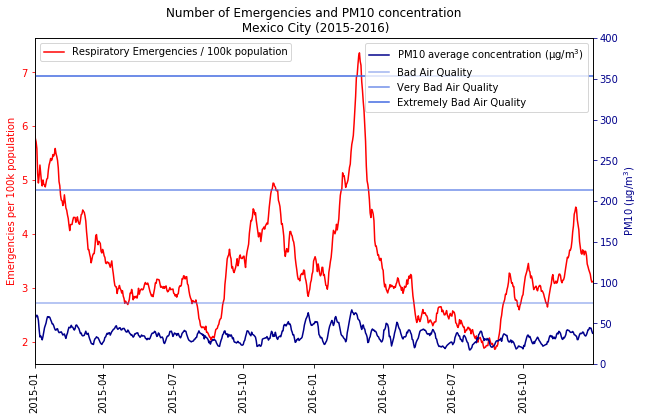

In [23]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.title("Number of Emergencies and PM10 concentration\n Mexico City (2015-2016)")


ax1.plot(emergencies_PM10_MA['date'], emergencies_PM10_MA['Cases/100k_TOTAL'], 
                   color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'r')


ax2 = ax1.twinx()
ax2.plot(emergencies_PM10_MA['date'], emergencies_PM10_MA['PM10_TOTAL_avg'], 
                    color='darkblue', linewidth=1.5, label='PM10 average concentration (µg/m$^{3}$)')
ax2.set_ylabel('PM10 (µg/m$^{3}$)', color = 'darkblue')
ax2.tick_params('y', colors = 'darkblue')
ax2.set_ylim(0,400)

ax2.axhline(y=75, color='royalblue', linewidth = 1.5, label= 'Bad Air Quality', alpha = 0.5)
ax2.axhline(y=214, color='royalblue', linewidth = 1.5, label= 'Very Bad Air Quality', alpha = 0.75)
ax2.axhline(y=354, color='royalblue', linewidth = 1.5, label= 'Extremely Bad Air Quality', alpha = 1)


ax1.legend(loc='upper left')
plt.legend(loc='upper right')

plt.savefig('../Images/PM10_total respiratory_CDMX_NEWdata.png')
plt.show()

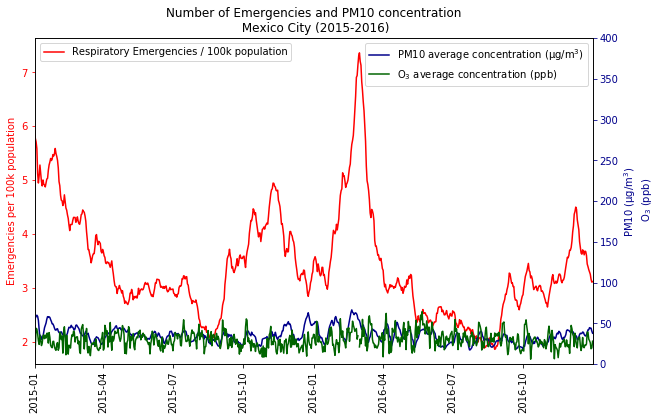

In [24]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.title("Number of Emergencies and PM10 concentration\n Mexico City (2015-2016)")


ax1.plot(emergencies_PM10_MA['date'], emergencies_PM10_MA['Cases/100k_TOTAL'], 
                   color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'r')


ax2 = ax1.twinx()
ax2.plot(emergencies_PM10_MA['date'], emergencies_PM10_MA['PM10_TOTAL_avg'], 
                    color='darkblue', linewidth=1.5, label='PM10 average concentration (µg/m$^{3}$)')
ax2.plot(emergencies_O3_MA['date'], emergencies_O3_MA['O3_TOTAL_avg'], 
                    color='darkgreen', linewidth=1.5, label='O$_{3}$ average concentration (ppb)')
ax2.set_ylabel('PM10 (µg/m$^{3}$) \n O$_{3}$ (ppb)', color = 'darkblue')
ax2.tick_params('y', colors = 'darkblue')
ax2.set_ylim(0,400)



ax1.legend(loc='upper left')
plt.legend(loc='upper right')



plt.savefig('../Images/PM10 AND O3_total respiratory_CDMX_NEWdata.png')
plt.show()

***

In [ ]:
summary_global_date = summary_global.reset_index()
summary_global_2016 = summary_global_date.loc[summary_global_date['date']>'2015-12-31']

***
### Graph of respiratory emergencies and O**$_{3}$** in Tlalpan


Create sub-dataframe to graph

In [25]:
emergencies_O3_Tlalpan_MA = summary_global_MA[['date', 'Cases/100k_TLALPAN', 'O3_TLALPAN']] 
emergencies_O3_Tlalpan_MA['O3_TLALPAN'] = summary_global['O3_TLALPAN']

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


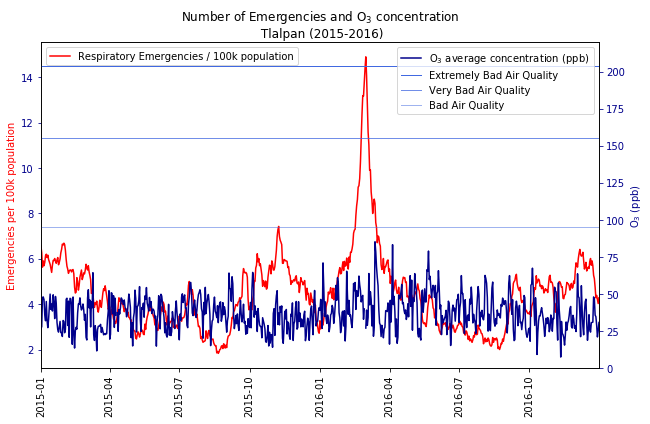

In [26]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.title("Number of Emergencies and O$_{3}$ concentration\n Tlalpan (2015-2016)")

ax1.plot(emergencies_O3_Tlalpan_MA['date'], emergencies_O3_Tlalpan_MA['Cases/100k_TLALPAN'], 
                   color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'darkblue')
plt.legend(loc='best')

ax2 = ax1.twinx()
ax2.plot(emergencies_O3_Tlalpan_MA['date'], emergencies_O3_Tlalpan_MA['O3_TLALPAN'], 
                    color='darkblue', linewidth=1.5, label='O$_{3}$ average concentration (ppb)')
ax2.set_ylabel('O$_{3}$ (ppb)', color = 'darkblue')
ax2.tick_params('y', colors = 'darkblue')
ax2.set_ylim(0,220)



ax2.axhline(y=204, color='royalblue', linewidth = 1, label= 'Extremely Bad Air Quality', alpha = 1)
ax2.axhline(y=155, color='royalblue', linewidth = 1, label= 'Very Bad Air Quality', alpha = 0.75)
ax2.axhline(y=95, color='royalblue', linewidth = 1, label= 'Bad Air Quality', alpha = 0.5)


ax1.legend(loc='upper left')
plt.legend(loc='upper right')


plt.savefig('../Images/Tlalpan_respiratorias_O3_NEWdata.png')
plt.show()


***
### Graph of respiratory emergencies and PM10 in Venustiano Carranza


Create sub-dataframe to graph

In [27]:
emergencies_PM10_Venustiano_MA = summary_global_MA[['date', 'Cases/100k_VENUSTIANO CARRANZA', 'PM10_VENUSTIANO']] 
emergencies_PM10_Venustiano_MA['PM10_VENUSTIANO'] = summary_global['PM10_VENUSTIANO']

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


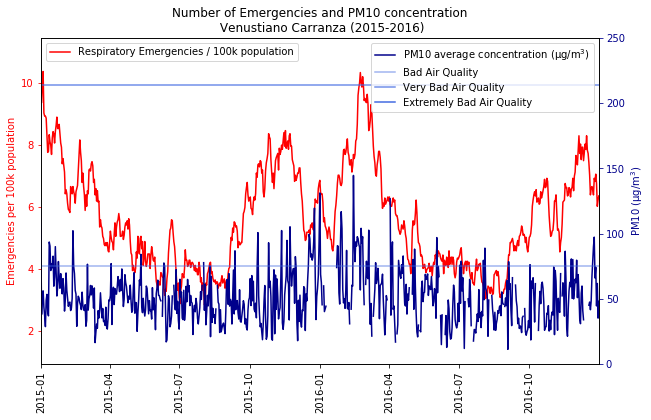

In [28]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.title("Number of Emergencies and PM10 concentration\n Venustiano Carranza (2015-2016)")

ax1.plot(emergencies_PM10_Venustiano_MA['date'], emergencies_PM10_Venustiano_MA['Cases/100k_VENUSTIANO CARRANZA'], 
                   color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'r')


ax2 = ax1.twinx()
ax2.plot(emergencies_PM10_Venustiano_MA['date'], emergencies_PM10_Venustiano_MA['PM10_VENUSTIANO'], 
                    color='darkblue', linewidth=1.5, label='PM10 average concentration (µg/m$^{3}$)')
ax2.set_ylabel('PM10 (µg/m$^{3}$)', color = 'darkblue')
ax2.tick_params('y', colors = 'darkblue')
ax2.set_ylim(0,250)

ax2.axhline(y=75, color='royalblue', linewidth = 1.5, label= 'Bad Air Quality', alpha = 0.5)
ax2.axhline(y=214, color='royalblue', linewidth = 1.5, label= 'Very Bad Air Quality', alpha = 0.75)
ax2.axhline(y=354, color='royalblue', linewidth = 1.5, label= 'Extremely Bad Air Quality', alpha = 1)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')



plt.savefig('../Images/PM10_respiratory_Venustiano Carranza_NEWdata(2).png')
plt.show()


***
### Graph of respiratory emergencies and PM10 in Iztapalapa


Create sub-dataframe to graph

In [29]:
emergencies_PM10_Iztapalapa_MA = summary_global_MA[['date', 'Cases/100k_IZTAPALAPA', 'PM10_IZTAPALAPA']] 
emergencies_PM10_Iztapalapa_MA['PM10_IZTAPALAPA'] = summary_global['PM10_IZTAPALAPA']

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


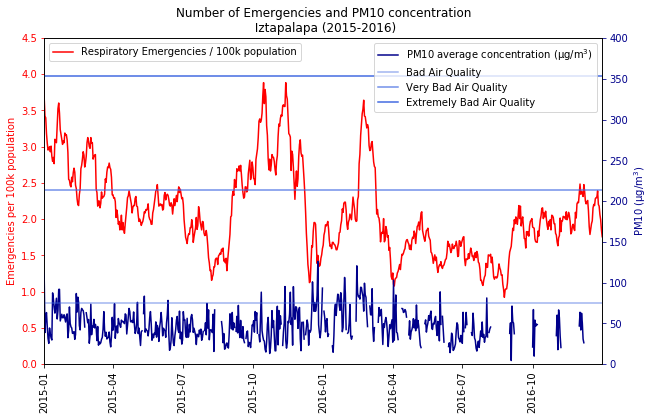

In [30]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.title("Number of Emergencies and PM10 concentration\n Iztapalapa (2015-2016)")

ax1.plot(emergencies_PM10_Iztapalapa_MA['date'], emergencies_PM10_Iztapalapa_MA['Cases/100k_IZTAPALAPA'], 
                   color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'r')
ax1.set_ylim(0,4.5)


ax2 = ax1.twinx()
ax2.plot(emergencies_PM10_Iztapalapa_MA['date'], emergencies_PM10_Iztapalapa_MA['PM10_IZTAPALAPA'], 
                    color='darkblue', linewidth=1.5, label='PM10 average concentration (µg/m$^{3}$)')
ax2.set_ylabel('PM10 (µg/m$^{3}$)', color = 'darkblue')
ax2.tick_params('y', colors = 'darkblue')
ax2.set_ylim(0,400)

ax2.axhline(y=75, color='royalblue', linewidth = 1.5, label= 'Bad Air Quality', alpha = 0.5)
ax2.axhline(y=214, color='royalblue', linewidth = 1.5, label= 'Very Bad Air Quality', alpha = 0.75)
ax2.axhline(y=354, color='royalblue', linewidth = 1.5, label= 'Extremely Bad Air Quality', alpha = 1)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')



plt.savefig('../Images/PM10_respiratory_Iztapalapa_NEWdata.png')
plt.show()


***
### Graph of respiratory emergencies and PM10 in Azcapotzalco


Create sub-dataframe to graph

In [31]:
emergencies_PM10_Azcapotzalco_MA = summary_global_MA[['date', 'Cases/100k_AZCAPOTZALCO', 'PM10_AZCAPOTZALCO']] 
emergencies_PM10_Azcapotzalco_MA['PM10_AZCAPOTZALCO'] = summary_global['PM10_AZCAPOTZALCO']

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


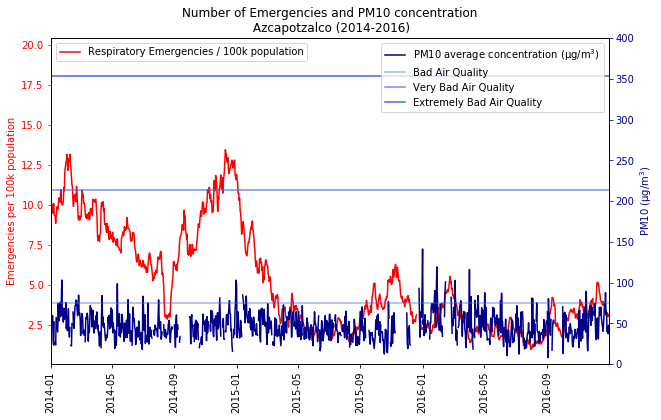

In [32]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.title("Number of Emergencies and PM10 concentration\n Azcapotzalco (2014-2016)")

ax1.plot(emergencies_PM10_Azcapotzalco_MA['date'], emergencies_PM10_Azcapotzalco_MA['Cases/100k_AZCAPOTZALCO'], 
                   color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2014-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'r')


ax2 = ax1.twinx()
ax2.plot(emergencies_PM10_Azcapotzalco_MA['date'], emergencies_PM10_Azcapotzalco_MA['PM10_AZCAPOTZALCO'], 
                    color='darkblue', linewidth=1.5, label='PM10 average concentration (µg/m$^{3}$)')
ax2.set_ylabel('PM10 (µg/m$^{3}$)', color = 'darkblue')
ax2.tick_params('y', colors = 'darkblue')
ax2.set_ylim(0,400)

ax2.axhline(y=75, color='royalblue', linewidth = 1.5, label= 'Bad Air Quality', alpha = 0.5)
ax2.axhline(y=214, color='royalblue', linewidth = 1.5, label= 'Very Bad Air Quality', alpha = 0.75)
ax2.axhline(y=354, color='royalblue', linewidth = 1.5, label= 'Extremely Bad Air Quality', alpha = 1)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')



plt.savefig('../Images/PM10_respiratory_Azcapotzalco_NEWdata.png')
plt.show()


***

***
### Graph of respiratory emergencies and PM10 in Tlalpan


Create sub-dataframe to graph

In [33]:
emergencies_PM10_Tlalpan_MA = summary_global_MA[['date', 'Cases/100k_TLALPAN', 'PM10_TLALPAN']] 
emergencies_PM10_Tlalpan_MA['PM10_TLALPAN'] = summary_global['PM10_TLALPAN']

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


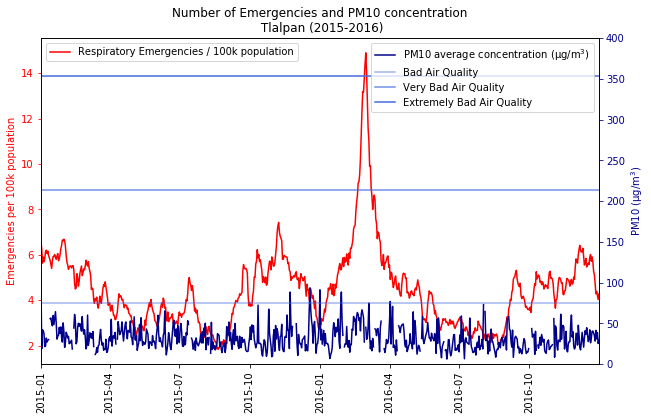

In [34]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.title("Number of Emergencies and PM10 concentration\n Tlalpan (2015-2016)")

ax1.plot(emergencies_PM10_Tlalpan_MA['date'], emergencies_PM10_Tlalpan_MA['Cases/100k_TLALPAN'], 
                   color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'r')


ax2 = ax1.twinx()
ax2.plot(emergencies_PM10_Tlalpan_MA['date'], emergencies_PM10_Tlalpan_MA['PM10_TLALPAN'], 
                    color='darkblue', linewidth=1.5, label='PM10 average concentration (µg/m$^{3}$)')
ax2.set_ylabel('PM10 (µg/m$^{3}$)', color = 'darkblue')
ax2.tick_params('y', colors = 'darkblue')
ax2.set_ylim(0,400)

ax2.axhline(y=75, color='royalblue', linewidth = 1.5, label= 'Bad Air Quality', alpha = 0.5)
ax2.axhline(y=214, color='royalblue', linewidth = 1.5, label= 'Very Bad Air Quality', alpha = 0.75)
ax2.axhline(y=354, color='royalblue', linewidth = 1.5, label= 'Extremely Bad Air Quality', alpha = 1)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')



plt.savefig('../Images/PM10_respiratory_Tlalpan_NEWdata.png')
plt.show()


***

***

***

***
### Graph of respiratory emergencies and O**$_{3}$** in Venustiano Carranza


Create sub-dataframe to graph

In [35]:
emergencies_O3_Venustiano_MA = summary_global_MA[['date', 'Cases/100k_VENUSTIANO CARRANZA', 'O3_VENUSTIANO']] 
emergencies_O3_Venustiano_MA['O3_VENUSTIANO'] = summary_global['O3_VENUSTIANO']

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


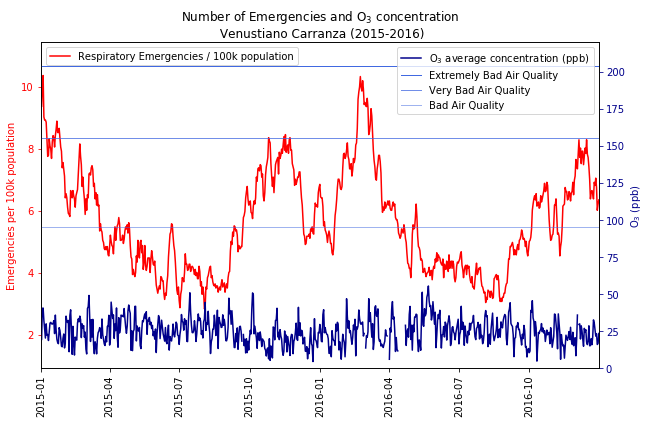

In [36]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

plt.title("Number of Emergencies and O$_{3}$ concentration\n Venustiano Carranza (2015-2016)")

ax1.plot(emergencies_O3_Venustiano_MA['date'], emergencies_O3_Venustiano_MA['Cases/100k_VENUSTIANO CARRANZA'], 
                   color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'r')


ax2 = ax1.twinx()
ax2.plot(emergencies_O3_Venustiano_MA['date'], emergencies_O3_Venustiano_MA['O3_VENUSTIANO'], 
                    color='darkblue', linewidth=1.5, label='O$_{3}$ average concentration (ppb)')
ax2.set_ylabel('O$_{3}$ (ppb)', color = 'darkblue')
ax2.tick_params('y', colors = 'darkblue')
ax2.set_ylim(0,220)


ax2.axhline(y=204, color='royalblue', linewidth = 1, label= 'Extremely Bad Air Quality', alpha = 1)
ax2.axhline(y=155, color='royalblue', linewidth = 1, label= 'Very Bad Air Quality', alpha = 0.75)
ax2.axhline(y=95, color='royalblue', linewidth = 1, label= 'Bad Air Quality', alpha = 0.5)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')



plt.savefig('../Images/O3_respiratory_Venustiano Carranza_NEWdata.png')
plt.show()


***


## Scatter plots

In [44]:
Cases_columns = ['Cases/100k_ÁLVARO OBREGÓN', 'Cases/100k_AZCAPOTZALCO', 
       'Cases/100k_BENITO JUÁREZ', 'Cases/100k_COYOACÁN',
       'Cases/100k_CUAJIMALPA DE MORELOS', 'Cases/100k_CUAUHTÉMOC',
       'Cases/100k_GUSTAVO A. MADERO', 'Cases/100k_IZTACALCO', 
       'Cases/100k_IZTAPALAPA', 'Cases/100k_LA MAGDALENA CONTRERAS',
       'Cases/100k_MIGUEL HIDALGO', 'Cases/100k_MILPA ALTA',
       'Cases/100k_TLÁHUAC', 'Cases/100k_TLALPAN',
       'Cases/100k_VENUSTIANO CARRANZA',
       'Cases/100k_XOCHIMILCO', 'Cases/100k_TOTAL']
Asma_columns =  ['ASMA/100k_ÁLVARO OBREGÓN', 'ASMA/100k_AZCAPOTZALCO', 
       'ASMA/100k_BENITO JUÁREZ', 'ASMA/100k_COYOACÁN',
       'ASMA/100k_CUAJIMALPA DE MORELOS', 'ASMA/100k_CUAUHTÉMOC',
       'ASMA/100k_GUSTAVO A. MADERO', 'ASMA/100k_IZTACALCO', 
       'ASMA/100k_IZTAPALAPA', 'ASMA/100k_LA MAGDALENA CONTRERAS',
       'ASMA/100k_MIGUEL HIDALGO', 'ASMA/100k_MILPA ALTA',
       'ASMA/100k_TLÁHUAC', 'ASMA/100k_TLALPAN',
       'ASMA/100k_VENUSTIANO CARRANZA',
       'ASMA/100k_XOCHIMILCO', 'ASMA/100k_TOTAL']
O3_columns = ['O3_AZCAPOTZALCO','O3_BENITOJUAREZ','O3_COYOACAN','O3_CUAJIMALPA','O3_IZTACALCO',
             'O3_IZTAPALAPA','O3_MIGUELHIDALGO','O3_MILPAALTA','O3_TLALPAN','O3_VENUSTIANO',
             'O3_XOCHIMILCO','O3_CUAUHTEMOC','O3_OBREGON']
PM10_columns= ['PM10_AZCAPOTZALCO','PM10_BENITOJUAREZ','PM10_COYOACAN','PM10_CUAJIMALPA',
               'PM10_CUAUHTEMOC','PM10_IZTACALCO','PM10_IZTAPALAPA','PM10_MIGUELHIDALGO',
               'PM10_MILPAALTA','PM10_TLALPAN','PM10_VENUSTIANO','PM10_XOCHIMILCO','PM10_OBREGON'] 

In [46]:
summary_2014 = summary_global.loc[summary_global['date']>= '2014-01-01']

In [47]:
summary_2014_Cases = summary_2014[Cases_columns]
summary_2014_Asma  = summary_2014[Asma_columns]
summary_2014_O3    = summary_2014[O3_columns]
summary_2014_PM10  = summary_2014[PM10_columns]

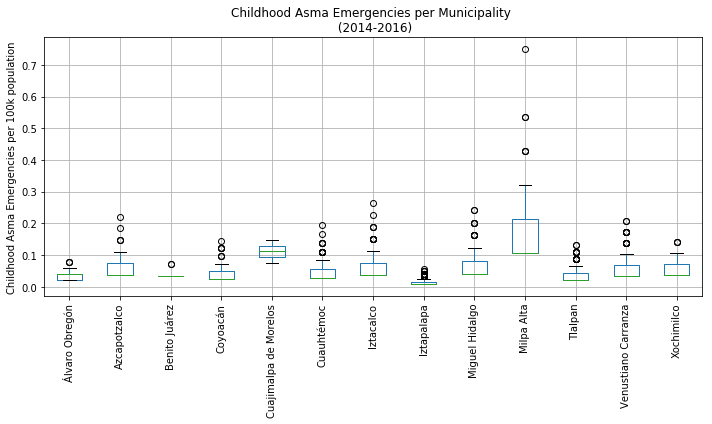

In [48]:
graphdata = summary_2014_Asma.rename(columns={'ASMA/100k_AZCAPOTZALCO':'Azcapotzalco',
                'ASMA/100k_BENITO JUÁREZ': 'Benito Juárez','ASMA/100k_COYOACÁN':'Coyoacán',
                'ASMA/100k_CUAJIMALPA DE MORELOS':'Cuajimalpa de Morelos', 'ASMA/100k_CUAUHTÉMOC':'Cuauhtémoc',
                'ASMA/100k_IZTACALCO':'Iztacalco','ASMA/100k_IZTAPALAPA':'Iztapalapa',
                'ASMA/100k_MIGUEL HIDALGO':'Miguel Hidalgo', 'ASMA/100k_MILPA ALTA':'Milpa Alta',
                'ASMA/100k_TLALPAN':'Tlalpan','ASMA/100k_VENUSTIANO CARRANZA':'Venustiano Carranza',
                'ASMA/100k_XOCHIMILCO':'Xochimilco','ASMA/100k_ÁLVARO OBREGÓN':'Álvaro Obregón'})
cols = ['Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán', 'Cuajimalpa de Morelos', 
        'Cuauhtémoc', 'Iztacalco', 'Iztapalapa', 'Miguel Hidalgo', 'Milpa Alta', 'Tlalpan', 
        'Venustiano Carranza', 'Xochimilco']
graphdata = graphdata[cols]

# ----------------------------------------------------------------------------------------------------------------

plt.figure(figsize =(10,6))

plt.title("Childhood Asma Emergencies per Municipality \n (2014-2016)")
plt.ylabel("Childhood Asma Emergencies per 100k population")

plt.grid()

graphdata.boxplot(column= cols, rot=90)

plt.tight_layout()
plt.savefig('../Images/boxplot_asmay.png')
plt.show()

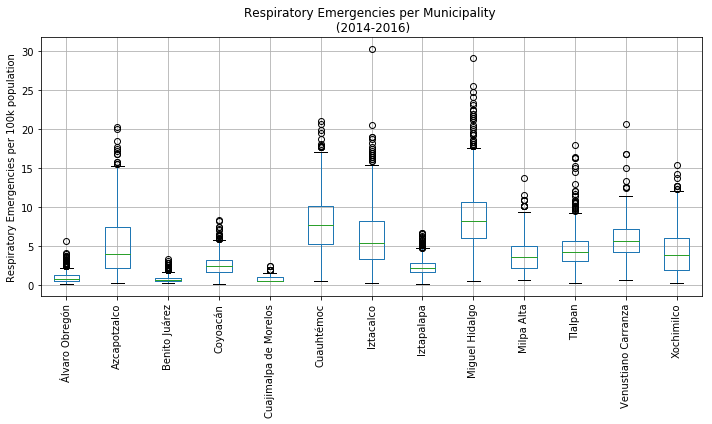

In [49]:
graphdata = summary_2014_Cases.rename(columns={'Cases/100k_AZCAPOTZALCO':'Azcapotzalco',
                'Cases/100k_BENITO JUÁREZ': 'Benito Juárez','Cases/100k_COYOACÁN':'Coyoacán',
                'Cases/100k_CUAJIMALPA DE MORELOS':'Cuajimalpa de Morelos', 'Cases/100k_CUAUHTÉMOC':'Cuauhtémoc',
                'Cases/100k_IZTACALCO':'Iztacalco','Cases/100k_IZTAPALAPA':'Iztapalapa',
                'Cases/100k_MIGUEL HIDALGO':'Miguel Hidalgo', 'Cases/100k_MILPA ALTA':'Milpa Alta',
                'Cases/100k_TLALPAN':'Tlalpan','Cases/100k_VENUSTIANO CARRANZA':'Venustiano Carranza',
                'Cases/100k_XOCHIMILCO':'Xochimilco','Cases/100k_ÁLVARO OBREGÓN':'Álvaro Obregón'})
cols = ['Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán', 'Cuajimalpa de Morelos', 
        'Cuauhtémoc', 'Iztacalco', 'Iztapalapa', 'Miguel Hidalgo', 'Milpa Alta', 'Tlalpan', 
        'Venustiano Carranza', 'Xochimilco']
graphdata = graphdata[cols]

# ----------------------------------------------------------------------------------------------------------------

plt.figure(figsize =(10,6))

plt.title("Respiratory Emergencies per Municipality \n (2014-2016)")
plt.ylabel("Respiratory Emergencies per 100k population")

plt.grid()

graphdata.boxplot(column= cols, rot=90)

plt.tight_layout()
plt.savefig('../Images/boxplot_Resp-emergency.png')
plt.show()

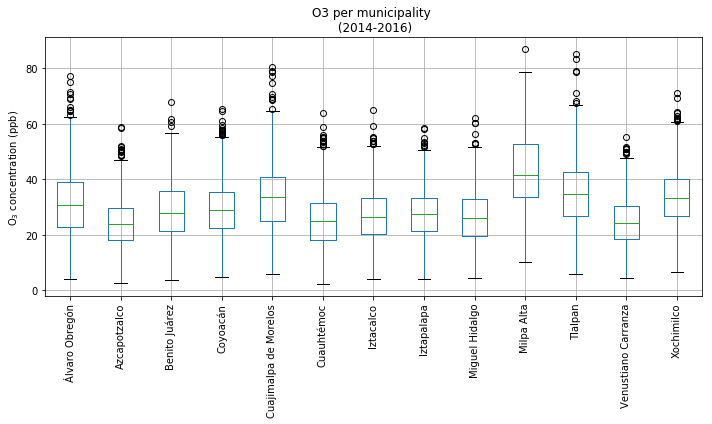

In [50]:
graphdata = summary_2014_O3.rename(columns={'O3_AZCAPOTZALCO':'Azcapotzalco',
                'O3_BENITOJUAREZ': 'Benito Juárez','O3_COYOACAN':'Coyoacán',
                'O3_CUAJIMALPA':'Cuajimalpa de Morelos', 'O3_CUAUHTEMOC':'Cuauhtémoc',
                'O3_IZTACALCO':'Iztacalco','O3_IZTAPALAPA':'Iztapalapa',
                'O3_MIGUELHIDALGO':'Miguel Hidalgo', 'O3_MILPAALTA':'Milpa Alta',
                'O3_TLALPAN':'Tlalpan','O3_VENUSTIANO':'Venustiano Carranza',
                'O3_XOCHIMILCO':'Xochimilco','O3_OBREGON':'Álvaro Obregón'})
cols = ['Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán', 'Cuajimalpa de Morelos', 
        'Cuauhtémoc', 'Iztacalco', 'Iztapalapa', 'Miguel Hidalgo', 'Milpa Alta', 'Tlalpan', 
        'Venustiano Carranza', 'Xochimilco']
graphdata = graphdata[cols]

# ----------------------------------------------------------------------------------------------------------------

plt.figure(figsize =(10,6))

plt.title("O3 per municipality \n (2014-2016)")
plt.ylabel("O$_{3}$ concentration (ppb)")

plt.grid()

graphdata.boxplot(column= cols, rot=90)
plt.tight_layout()

plt.savefig('../Images/boxplot_O3.png')
plt.show()

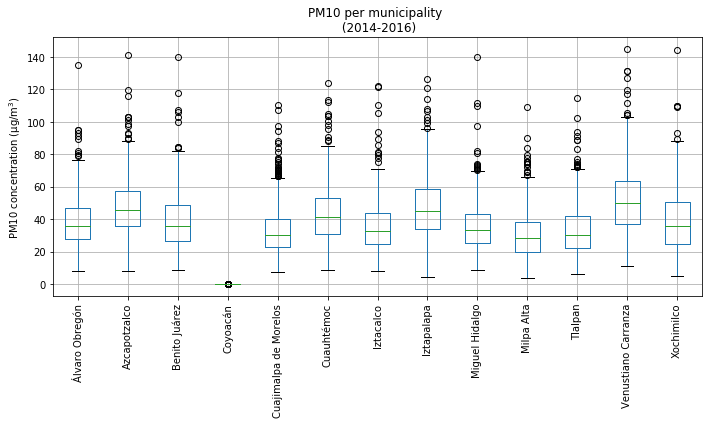

In [51]:
graphdata = summary_2014_PM10.rename(columns={'PM10_AZCAPOTZALCO':'Azcapotzalco',
                'PM10_BENITOJUAREZ': 'Benito Juárez','PM10_COYOACAN':'Coyoacán',
                'PM10_CUAJIMALPA':'Cuajimalpa de Morelos', 'PM10_CUAUHTEMOC':'Cuauhtémoc',
                'PM10_IZTACALCO':'Iztacalco','PM10_IZTAPALAPA':'Iztapalapa',
                'PM10_MIGUELHIDALGO':'Miguel Hidalgo', 'PM10_MILPAALTA':'Milpa Alta',
                'PM10_TLALPAN':'Tlalpan','PM10_VENUSTIANO':'Venustiano Carranza',
                'PM10_XOCHIMILCO':'Xochimilco','PM10_OBREGON':'Álvaro Obregón'})
cols = ['Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán', 'Cuajimalpa de Morelos', 
        'Cuauhtémoc', 'Iztacalco', 'Iztapalapa', 'Miguel Hidalgo', 'Milpa Alta', 'Tlalpan', 
        'Venustiano Carranza', 'Xochimilco']
graphdata = graphdata[cols]

# ----------------------------------------------------------------------------------------------------------------

plt.figure(figsize =(10,6))

plt.title("PM10 per municipality \n (2014-2016)")
plt.ylabel("PM10 concentration (µg/m$^{3}$)")

plt.grid()


graphdata.boxplot(column= cols, rot=90)
plt.tight_layout()

plt.savefig('../Images/boxplot_PM10.png')
plt.show()

***
# Gausian filter

### Graph of respiratory emergencies and PM10 in Venustiano Carranza

Create sub-dataframe to graph

In [54]:
emergencies_PM10_Venustiano_MA = summary_global_MA[['date', 'Cases/100k_VENUSTIANO CARRANZA', 'PM10_VENUSTIANO']] 
emergencies_PM10_Venustiano_MA['PM10_VENUSTIANO'] = summary_global['PM10_VENUSTIANO']

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
summary_global.columns

Index(['date', 'Cases/100k_ÁLVARO OBREGÓN', 'ASMA/100k_ÁLVARO OBREGÓN',
       'Cases/100k_AZCAPOTZALCO', 'ASMA/100k_AZCAPOTZALCO',
       'Cases/100k_BENITO JUÁREZ', 'ASMA/100k_BENITO JUÁREZ',
       'Cases/100k_COYOACÁN', 'ASMA/100k_COYOACÁN',
       'Cases/100k_CUAJIMALPA DE MORELOS', 'ASMA/100k_CUAJIMALPA DE MORELOS',
       'Cases/100k_CUAUHTÉMOC', 'ASMA/100k_CUAUHTÉMOC',
       'Cases/100k_GUSTAVO A. MADERO', 'ASMA/100k_GUSTAVO A. MADERO',
       'Cases/100k_IZTACALCO', 'ASMA/100k_IZTACALCO', 'Cases/100k_IZTAPALAPA',
       'ASMA/100k_IZTAPALAPA', 'Cases/100k_LA MAGDALENA CONTRERAS',
       'ASMA/100k_LA MAGDALENA CONTRERAS', 'Cases/100k_MIGUEL HIDALGO',
       'ASMA/100k_MIGUEL HIDALGO', 'Cases/100k_MILPA ALTA',
       'ASMA/100k_MILPA ALTA', 'Cases/100k_TLÁHUAC', 'ASMA/100k_TLÁHUAC',
       'Cases/100k_TLALPAN', 'ASMA/100k_TLALPAN',
       'Cases/100k_VENUSTIANO CARRANZA', 'ASMA/100k_VENUSTIANO CARRANZA',
       'Cases/100k_XOCHIMILCO', 'ASMA/100k_XOCHIMILCO', 'Cases/100k_TOTAL

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


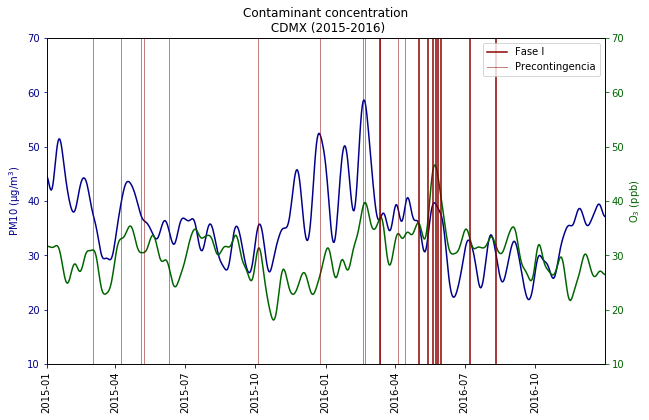

In [56]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

aux = summary_global[['date', 'Cases/100k_TOTAL', 'PM10_TOTAL_avg', 'O3_TOTAL_avg']]
aux['Cases/100k_TOTAL'] = summary_global_MA['Cases/100k_TOTAL']
aux = aux.loc[aux['date']>= '2015-01-01']
aux = aux.sort_values('date')
x  = aux['date']
y1 = aux['Cases/100k_TOTAL']
y2_aux = aux['PM10_TOTAL_avg']
y2_aux = y2_aux.fillna(y2_aux.mean(), limit=1)
y2_aux = y2_aux.interpolate()
y3_aux = aux['O3_TOTAL_avg']
y3_aux = y3_aux.fillna(y2_aux.mean(), limit=1)
y3_aux = y3_aux.interpolate()

# df.fillna(df.mean())

# y1 = gaussian_filter1d(y1_aux, 7)
y2 = gaussian_filter1d(y2_aux, 5)
y3 = gaussian_filter1d(y3_aux, 5)

plt.title("Contaminant concentration\n CDMX (2015-2016)")

ax1.plot(x, y2, color='darkblue', linewidth=1.5, label='PM10 concentration (µg/m$^{3}$)')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel('PM10 (µg/m$^{3}$)', color = 'darkblue')
ax1.tick_params('y', colors = 'darkblue')
ax1.set_ylim(10,70)
# ax1.axhline(y=95, color='forestgreen', linewidth = 1, label= 'Bad Air Quality', alpha = 0.5)
# ax1.axhline(y=75, color='royalblue', linewidth = 1, label= 'Bad Air Quality', alpha = 0.5)




ax2 = ax1.twinx()
ax2.plot(x, y3, color='darkgreen', linewidth=1.5 )
ax2.set_ylabel('O$_{3}$ (ppb)', color = 'darkgreen')
ax2.tick_params('y', colors = 'darkgreen')
ax2.set_ylim(10,70)
#, label='O$_{3}$ concentration (ppb)'


ax2.axvline(x='2016-03-12', linewidth = 1.5, color='darkred', alpha = 1, label = 'Fase I')
ax2.axvline(x='2016-05-02', linewidth = 1.5, color='darkred', alpha = 1)
ax2.axvline(x='2016-05-14', linewidth = 1.5, color='darkred', alpha = 1)
ax2.axvline(x='2016-05-20', linewidth = 1.5, color='darkred', alpha = 1)
ax2.axvline(x='2016-05-24', linewidth = 1.5, color='darkred', alpha = 1)
ax2.axvline(x='2016-05-27', linewidth = 1.5, color='darkred', alpha = 1)
ax2.axvline(x='2016-05-31', linewidth = 1.5, color='darkred', alpha = 1)
ax2.axvline(x='2016-07-08', linewidth = 1.5, color='darkred', alpha = 1)
ax2.axvline(x='2016-08-11', linewidth = 1.5, color='darkred', alpha = 1)

ax2.axvline(x='2016-02-19', linewidth = 1, color='darkred', alpha = 0.5, label='Precontingencia')
ax2.axvline(x='2016-02-21', linewidth = 1, color='darkred', alpha = 0.5)
ax2.axvline(x='2016-03-12', linewidth = 1, color='darkred', alpha = 0.5)
ax2.axvline(x='2016-04-14', linewidth = 1, color='darkred', alpha = 0.5)
ax2.axvline(x='2016-04-05', linewidth = 1, color='darkred', alpha = 0.5)
ax2.axvline(x='2015-03-03', linewidth = 1, color='darkred', alpha = 0.5)
ax2.axvline(x='2015-04-08', linewidth = 1, color='darkred', alpha = 0.5)
ax2.axvline(x='2015-05-05', linewidth = 1, color='darkred', alpha = 0.5)
ax2.axvline(x='2015-05-09', linewidth = 1, color='darkred', alpha = 0.5)
ax2.axvline(x='2015-06-10', linewidth = 1, color='darkred', alpha = 0.5)
ax2.axvline(x='2015-10-04', linewidth = 1, color='darkred', alpha = 0.5)
ax2.axvline(x='2015-12-25', linewidth = 1, color='darkred', alpha = 0.5)


ax2.legend(loc='best')





plt.savefig('../Images/PM10 and O3_respiratory_CDMX_gausian_contingency lines.png')
plt.show()

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


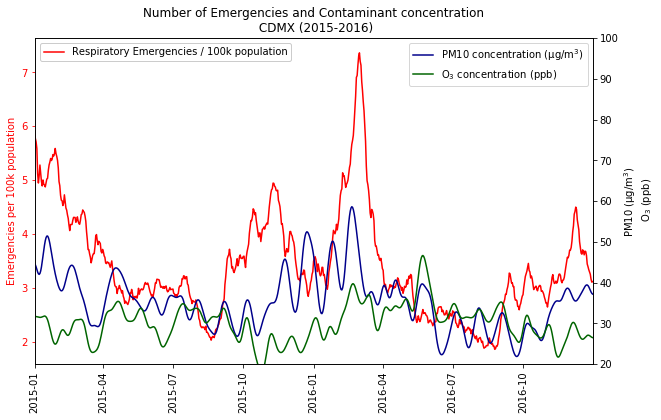

In [57]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

aux = summary_global[['date', 'Cases/100k_TOTAL', 'PM10_TOTAL_avg', 'O3_TOTAL_avg']]
aux['Cases/100k_TOTAL'] = summary_global_MA['Cases/100k_TOTAL']
aux = aux.loc[aux['date']>= '2015-01-01']
aux = aux.sort_values('date')
x  = aux['date']
y1 = aux['Cases/100k_TOTAL']
y2_aux = aux['PM10_TOTAL_avg']
y2_aux = y2_aux.fillna(y2_aux.mean(), limit=1)
y2_aux = y2_aux.interpolate()
y3_aux = aux['O3_TOTAL_avg']
y3_aux = y3_aux.fillna(y2_aux.mean(), limit=1)
y3_aux = y3_aux.interpolate()

# df.fillna(df.mean())

# y1 = gaussian_filter1d(y1_aux, 7)
y2 = gaussian_filter1d(y2_aux, 5)
y3 = gaussian_filter1d(y3_aux, 5)

plt.title("Number of Emergencies and Contaminant concentration\n CDMX (2015-2016)")

ax1.plot(x, y1, color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'r')


ax2 = ax1.twinx()
ax2.plot(x, y2, color='darkblue', linewidth=1.5, label='PM10 concentration (µg/m$^{3}$)')
ax2.plot(x, y3, color='darkgreen', linewidth=1.5, label='O$_{3}$ concentration (ppb)' )
ax2.set_ylabel('PM10 (µg/m$^{3}$) \n O$_{3}$ (ppb)', color = 'black')
ax2.tick_params('y', colors = 'black')
ax2.set_ylim(20,100)


# ax2.axvline(x='2016-02-19', linewidth = 1, color='darkviolet', alpha = 0.5, label='Precontingencia')
# ax2.axvline(x='2016-02-21', linewidth = 1, color='darkviolet', alpha = 0.5)
# ax2.axvline(x='2016-03-12', linewidth = 1.5, color='indigo', alpha = 0.75, label = 'Fase I')
# ax2.axvline(x='2016-04-04', linewidth = 1.5, color='indigo', alpha = 0.75)

# ax2.axvline(x='2015-03-03', linewidth = 1, color='darkviolet', alpha = 0.5)
# ax2.axvline(x='2015-04-08', linewidth = 1, color='darkviolet', alpha = 0.5)
# ax2.axvline(x='2015-05-05', linewidth = 1, color='darkviolet', alpha = 0.5)
# ax2.axvline(x='2015-05-09', linewidth = 1, color='darkviolet', alpha = 0.5)
# ax2.axvline(x='2015-06-10', linewidth = 1, color='darkviolet', alpha = 0.5)
# ax2.axvline(x='2015-10-04', linewidth = 1, color='darkviolet', alpha = 0.5)
# ax2.axvline(x='2015-12-25', linewidth = 1, color='darkviolet', alpha = 0.5)


ax1.legend(loc='best', facecolor='white', framealpha=1)
ax2.legend(loc='best')





plt.savefig('../Images/PM10 and O3_respiratory_CDMX_gausian_.png')
plt.show()


Text(0.5, 0, 'PM10')

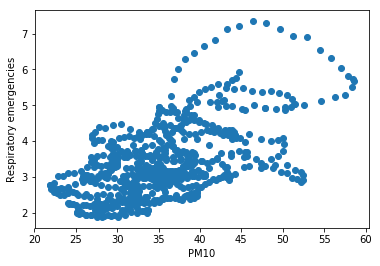

In [58]:
plt.scatter(y2,y1)
plt.ylabel('Respiratory emergencies')
plt.xlabel('PM10')

In [59]:
from scipy import stats
stats.pearsonr(y2, y1)

(0.5614880742781828, 5.84622154977178e-62)

In [60]:
stats.kendalltau(y2,y1)

KendalltauResult(correlation=0.35953763341240685, pvalue=6.22399624083789e-48)

## Grafica para PM10 - Gaussian

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


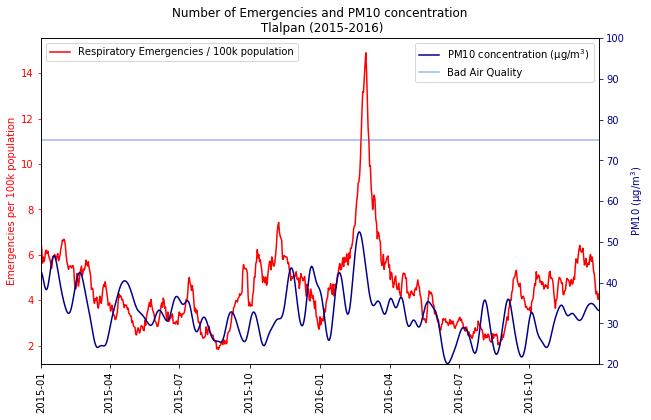

In [61]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

aux = summary_global[['date', 'Cases/100k_TLALPAN', 'PM10_TLALPAN']]
aux['Cases/100k_TLALPAN'] = summary_global_MA['Cases/100k_TLALPAN']
aux = aux.loc[aux['date']>= '2015-01-01']
aux = aux.sort_values('date')
x  = aux['date']
y1 = aux['Cases/100k_TLALPAN']
y2_aux = aux['PM10_TLALPAN']
y2_aux = y2_aux.fillna(y2_aux.mean(), limit=1)
y2_aux = y2_aux.interpolate()
y1 = y1.fillna(0)



y2 = gaussian_filter1d(y2_aux, 5)
# y3 = gaussian_filter1d(y3_aux, 5)


plt.title("Number of Emergencies and PM10 concentration\n Tlalpan (2015-2016)")



ax1.plot(x, y1, color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'r')


ax2 = ax1.twinx()
ax2.plot(x, y2, color='darkblue', linewidth=1.5, label='PM10 concentration (µg/m$^{3}$)')
# ax2.plot(x, y3, color='darkgreen', linewidth=1.5, label='O$_{3}$ concentration (ppb)' )
ax2.set_ylabel('PM10 (µg/m$^{3}$)', color = 'darkblue')
ax2.tick_params('y', colors = 'darkblue')
ax2.set_ylim(20,100)





ax2.axhline(y=75, color='royalblue', linewidth = 1.5, label= 'Bad Air Quality', alpha = 0.5)
# ax2.axhline(y=214, color='royalblue', linewidth = 1.5, label= 'Very Bad Air Quality', alpha = 0.75)
# ax2.axhline(y=354, color='royalblue', linewidth = 1.5, label= 'Extremely Bad Air Quality', alpha = 1)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')




plt.savefig('../Images/PM10_respiratory_TLALPAN_gausian.png')
plt.show()


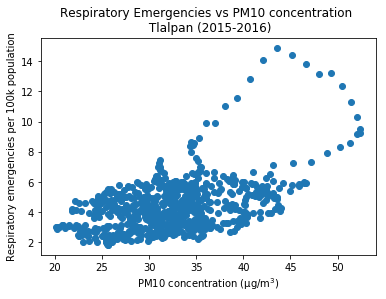

In [62]:
plt.figure(figsize=(6,4))

plt.title("Respiratory Emergencies vs PM10 concentration \n Tlalpan (2015-2016)")
plt.scatter(y2,y1)
plt.ylabel('Respiratory emergencies per 100k population')
plt.xlabel('PM10 concentration (µg/m$^{3}$)')

plt.savefig('../Images/correlation PM10 TLALPAN.png')
plt.show()

In [63]:
from scipy import stats
r, p = stats.pearsonr(y2, y1)
print(f"R = {r} \np-value = {p}")

R = 0.49306578211008284 
p-value = 4.812019180462001e-46


## Grafica para O3 - Gaussian

C:\Users\sandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


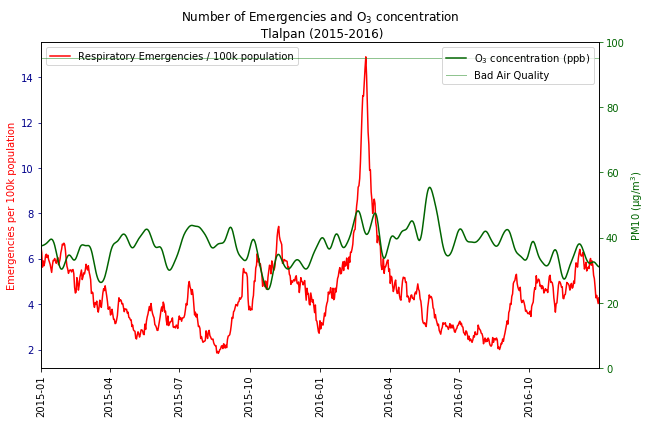

In [64]:
fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(10)

aux = summary_global[['date', 'Cases/100k_TLALPAN', 'O3_TLALPAN']]
aux['Cases/100k_TLALPAN'] = summary_global_MA['Cases/100k_TLALPAN']
aux = aux.loc[aux['date']>= '2015-01-01']
aux = aux.sort_values('date')
x  = aux['date']
y1 = aux['Cases/100k_TLALPAN']
y2_aux = aux['O3_TLALPAN']
y2_aux = y2_aux.fillna(y2_aux.mean(), limit=1)
y2_aux = y2_aux.interpolate()
y1 = y1.fillna(y1.mean(), limit=1)
y1 = y1.interpolate()

y2 = gaussian_filter1d(y2_aux, 5)


plt.title("Number of Emergencies and O$_{3}$ concentration\n Tlalpan (2015-2016)")
#--------------


ax1.plot(x, y1, color='red', linewidth=1.5, label='Respiratory Emergencies / 100k population')
x_ticks = ['    Jan', '    Feb', '    Mar', '    Apr', '    May', '    Jun', 
                    '    Jul', '    Aug', '    Sep', '    Oct', '    Nov', '    Dec']
x_locs = np.array(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', 
                   '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'])
ax1.set_xlim(['2015-01-01', '2016-12-31'])
ax1.set_xticks(x_locs)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.set_ylabel("Emergencies per 100k population", color = 'r')
ax1.tick_params('y', colors = 'darkblue')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='darkgreen', linewidth=1.5, label='O$_{3}$ concentration (ppb)')
ax2.set_ylabel('PM10 (µg/m$^{3}$)', color = 'darkgreen')
ax2.tick_params('y', colors = 'darkgreen')
ax2.set_ylim(0,100)

# ax2.axhline(y=204, color='forestgreen', linewidth = 1, label= 'Extremely Bad Air Quality', alpha = 1)
# ax2.axhline(y=155, color='forestgreen', linewidth = 1, label= 'Very Bad Air Quality', alpha = 0.75)
ax2.axhline(y=95, color='forestgreen', linewidth = 1, label= 'Bad Air Quality', alpha = 0.5)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')

plt.savefig('../Images/O3_respiratory_TLALPAN_gausian.png')
plt.show()



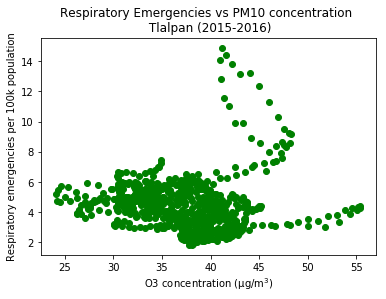

In [65]:
plt.figure(figsize=(6,4))

plt.title("Respiratory Emergencies vs PM10 concentration \n Tlalpan (2015-2016)")
plt.scatter(y2,y1, color="green")
plt.ylabel('Respiratory emergencies per 100k population')
plt.xlabel('O3 concentration (µg/m$^{3}$)')

plt.savefig('../Images/correlation O3 Tlalpan.png')
plt.show()

In [66]:
from scipy import stats
r, p = stats.pearsonr(y2, y1)
print(f"R = {r} \np-value = {p}")

R = -0.02114668901748985 
p-value = 0.5681157891648195
